<a href="https://colab.research.google.com/github/RaghavSrivastava25/INSAID-Fraud-Detetction/blob/main/INSAID_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#import pandas library
import pandas as pd
#converting the csv into a pandas dataframe and reading it 
data = pd.read_csv('Fraud.csv')
#printing the first 10 instances of the data
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [60]:
#information about the above declared pandas dataframe 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236623 entries, 0 to 3236622
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 271.6+ MB


In [61]:
#Description of the data in the DataFrame
#This includes mean, count, std deviation, percentiles, and min-max values of all the features
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.236623e+06,3.236623e+06,3.236623e+06,3.236623e+06,3.236622e+06,3.236622e+06,3.236622e+06,3.236622e+06
mean,1.325363e+02,1.578128e+05,8.422132e+05,8.636915e+05,9.948082e+05,1.101041e+06,8.746774e-04,3.089641e-07
std,7.919490e+01,2.688958e+05,2.907221e+06,2.943629e+06,2.301515e+06,2.383357e+06,2.956201e-02,5.558454e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+01,1.259114e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.570000e+02,7.590962e+04,1.458500e+04,0.000000e+00,1.368836e+05,2.226277e+05,0.000000e+00,0.000000e+00
75%,2.020000e+02,2.110998e+05,1.125269e+05,1.519030e+05,9.433840e+05,1.125753e+06,0.000000e+00,0.000000e+00
max,2.500000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.265577e+07,4.285430e+07,1.000000e+00,1.000000e+00


In [62]:
#sum of all the null values in each column in the dataframe
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [63]:
#the pairwise correlation of all columns in the dataframe
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.008079,-0.008528,-0.008131,0.003314,-0.006499,-0.003262,0.000558
amount,-0.008079,1.000000,0.005926,0.001319,0.216177,0.312157,0.126693,0.009914
oldbalanceOrg,-0.008528,0.005926,1.000000,0.999084,0.093500,0.064015,0.005408,0.000786
newbalanceOrig,-0.008131,0.001319,0.999084,1.000000,0.095504,0.063904,-0.007981,0.000772
oldbalanceDest,0.003314,0.216177,0.093500,0.095504,1.000000,0.986616,-0.006690,-0.000240
newbalanceDest,-0.006499,0.312157,0.064015,0.063904,0.986616,1.000000,0.000498,-0.000257
isFraud,-0.003262,0.126693,0.005408,-0.007981,-0.006690,0.000498,1.000000,0.018786
isFlaggedFraud,0.000558,0.009914,0.000786,0.000772,-0.000240,-0.000257,0.018786,1.000000


In [64]:
#shape of the dataframe
data.shape

(3236623, 11)

In [65]:
#reducing dimensionality of the data
#dropping columns with redundant, futile information
data = data.drop(columns=['oldbalanceOrg', 'oldbalanceDest', 'isFlaggedFraud', 'nameOrig', 'nameDest'])

In [68]:
#declaring the target variable
Y = data['isFraud']
#checking the shape of 'Y'
Y.shape
#selecting 40% of 'Y' for the model
Y = Y[0:1294649]
#replacing the missing values with '1'
Y.fillna(value=1, inplace=True)
#printing 'Y'
print(Y)

0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
          ... 
1294644    0.0
1294645    0.0
1294646    0.0
1294647    0.0
1294648    0.0
Name: isFraud, Length: 1294649, dtype: float64


In [70]:
#declaring the predictor variable/ Feature matrix, dropping the 'Y' column
X = data.drop(columns=['isFraud'])
#checking the shape of 'X'
X.shape
#selecting 40% of 'X' for the model
X = X[0:1294649]
#printing 'X'
print(X)

         step      type     amount  newbalanceOrig  newbalanceDest
0           1   PAYMENT    9839.64       160296.36            0.00
1           1   PAYMENT    1864.28        19384.72            0.00
2           1  TRANSFER     181.00            0.00            0.00
3           1  CASH_OUT     181.00            0.00            0.00
4           1   PAYMENT   11668.14        29885.86            0.00
...       ...       ...        ...             ...             ...
1294644   136   PAYMENT    8520.90        32368.86            0.00
1294645   136   PAYMENT   33016.65            0.00            0.00
1294646   136  CASH_OUT  181611.96            0.00      1478579.75
1294647   136  CASH_OUT   38481.09            0.00        38481.09
1294648   136  CASH_OUT  241181.58            0.00       241181.58

[1294649 rows x 5 columns]


In [72]:
#converting categorical variables in X['type'] to numerical
for i in X['type']:
  if(i=="CASH-IN"):
    X['type']=1
  if(i=="CASH-OUT"):
    X['type']=2
  if(i=="DEBIT"):
    X['type']=3
  if(i=="PAYMENT"):
    X['type']=4
  if(i=="TRANSFER"):
    X['type']=5

In [73]:
print(X)

         step  type     amount  newbalanceOrig  newbalanceDest
0           1     4    9839.64       160296.36            0.00
1           1     4    1864.28        19384.72            0.00
2           1     4     181.00            0.00            0.00
3           1     4     181.00            0.00            0.00
4           1     4   11668.14        29885.86            0.00
...       ...   ...        ...             ...             ...
1294644   136     4    8520.90        32368.86            0.00
1294645   136     4   33016.65            0.00            0.00
1294646   136     4  181611.96            0.00      1478579.75
1294647   136     4   38481.09            0.00        38481.09
1294648   136     4  241181.58            0.00       241181.58

[1294649 rows x 5 columns]


In [74]:
#importing Simple Imputer from Sklearn
from sklearn.impute import SimpleImputer 
#creating the imputer class with appropriate parameters to fill in the missing values
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
#using the fit_transform method on 'X' to replace the missing values
X = imputer.fit_transform(X)

In [75]:
#importing Standard Scaler from Sklearn
from sklearn.preprocessing import StandardScaler
#creating the standardscaler class
scaler = StandardScaler()
#using the fit_transform methos on 'X' to scale the feature values
X_scaled = scaler.fit_transform(X)
#printing 'X_scaled'
print(X_scaled)
#checking the shape of 'X_scaled'
X_scaled.shape

[[-1.06095672  0.         -0.56112125 -0.244498   -0.46302332]
 [-1.06095672  0.         -0.59032083 -0.29134433 -0.46302332]
 [-1.06095672  0.         -0.59648369 -0.29778881 -0.46302332]
 ...
 [ 2.08429509  0.          0.06777573 -0.29778881  0.14902625]
 [ 2.08429509  0.         -0.45625848 -0.29778881 -0.4470943 ]
 [ 2.08429509  0.          0.28587346 -0.29778881 -0.3631876 ]]


(1294649, 5)

In [76]:
#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
#splitting the data into train & test sets, with the test set having 20% of the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=123)

In [78]:
X_train.shape

(1035719, 5)

In [79]:
X_test.shape

(258930, 5)

In [80]:
Y_train.shape

(1035719,)

In [81]:
Y_test.shape

(258930,)

In [82]:
#importing cross_val_score, RepeatedStratifiedKFold from sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#importing the linear model Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [89]:
#defining the model with the solver='lbfgs'
model = LogisticRegression(solver='lbfgs')
#fitting the model on the train set
model.fit(X_train, Y_train)
#prediction of the model on the test set
Y_pred = model.predict(X_test)
#calcuting the model's accuracy
print(model.score(X_test, Y_test))

0.9988606959409879


In [84]:
#importing confusion matrix from sklearn
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
#printing the confusion matrix
print(cm)

[[258598     12]
 [   283     37]]


In [85]:
#importing the classification report from sklearn
#accuracy is the not ideal metric for measuring the model's performance over a dataset with a class imbalance like this one
from sklearn.metrics import classification_report
#declaring the target names
target_names = ['Not_Fraud', 'Fraud']
#printing the classification report
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Not_Fraud       1.00      1.00      1.00    258610
       Fraud       0.76      0.12      0.20       320

    accuracy                           1.00    258930
   macro avg       0.88      0.56      0.60    258930
weighted avg       1.00      1.00      1.00    258930



In [86]:
#performing K-fold cross validaiton
import numpy as np
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, Y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
#printing mean, min, max values of the cross_val_score
print(np.mean(scores))
print(min(scores))
print(max(scores))

0.8417581010015079
0.7521847569699547
0.9150083620122965


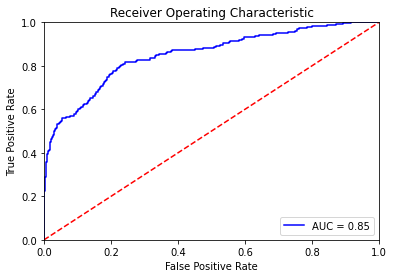

In [87]:
#plotting the ROC_AUC curve for the model
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
#false_positive_rate, true_positive_rate
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#